# Machine learning non supervisé sur une image

On va transformer les couleurs d'une image

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## On importe l'image dans un array

In [2]:
image_paris = plt.imread("./data/tour-eiffel.png")

In [3]:
image_paris.shape

(694, 1024, 3)

## On transforme l'array à 3 dimensions en un array à deux dimensions

In [4]:
# ces 3 codes sont équivalents
data = image_paris.reshape(694 * 1024, 3)
data = image_paris.reshape(image_paris.shape[0]*image_paris.shape[1], 3)
data = image_paris.reshape(-1, 3)

## On applique un modèle de KMeans sur l'array

In [5]:
from sklearn.cluster import KMeans

In [6]:
# on choisit de prendre 4 couleurs
modele_km = KMeans(n_clusters=4)

In [7]:
modele_km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# la couleur centrale des classe est stockée :
center = modele_km.cluster_centers_

In [9]:
# la classe de chaque pixel est stockée :
labels = modele_km.labels_

## On reconstruit un arrayà deux dimensions

In [10]:
data2 = center[labels]

## On repasse à 3 dimension et on affiche l'image

In [11]:
image_couleurs = data2.reshape(image_paris.shape)

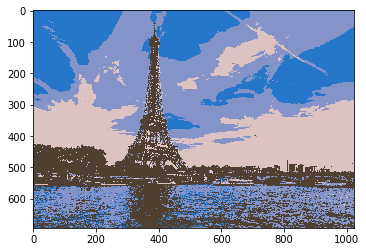

In [12]:
plt.imshow(image_couleurs)

In [14]:
def image_ml(image,nb_couleurs):
    """ Fonction appliquant la transformations sur une image
    Input :
        - image : chemin vers l'image
        - nb_couleurs : nombre de couleurs en sortie
    """
    
    image_paris = plt.imread(image)
    data = image_paris.reshape(-1, 3)
    modele_km = KMeans(n_clusters=nb_couleurs)
    modele_km.fit(data)
    data2 = modele_km.cluster_centers_[modele_km.labels_]
    image_couleurs = data2.reshape(image_paris.shape)
    plt.imshow(image_couleurs)

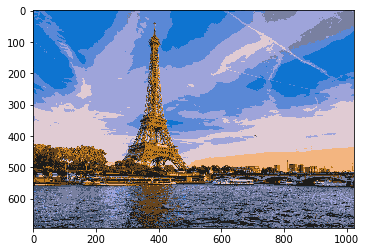

In [15]:
image_ml("./data/tour-eiffel.png",nb_couleurs=10)